# Chess Piece Detection Model Analysis

📦 1. Install and Import Dependencies


In [2]:
%pip install roboflow supervision matplotlib seaborn opencv-python-headless --quiet

import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from roboflow import Roboflow
from supervision.draw.color import Color
from supervision import Detections, BoxAnnotator

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\SHREE\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


🔧 2. Initialize the Roboflow Model


In [3]:
rf = Roboflow(api_key="Hc5MzZYyVof2Gw4hrAGc")
project = rf.workspace().project("chesspiecedetection-ptwhz")
model = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


🖼️ 3. Run Detection on a Test Image

In [6]:
result = model.predict(r"images\1.jpg", confidence=30, overlap=30).json()

# Save detection results
with open("detection_results.json", "w") as f:
    json.dump(result, f, indent=2)

# Load image
image = cv2.imread(r"images\\1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


🧊 4. Visualize Detections

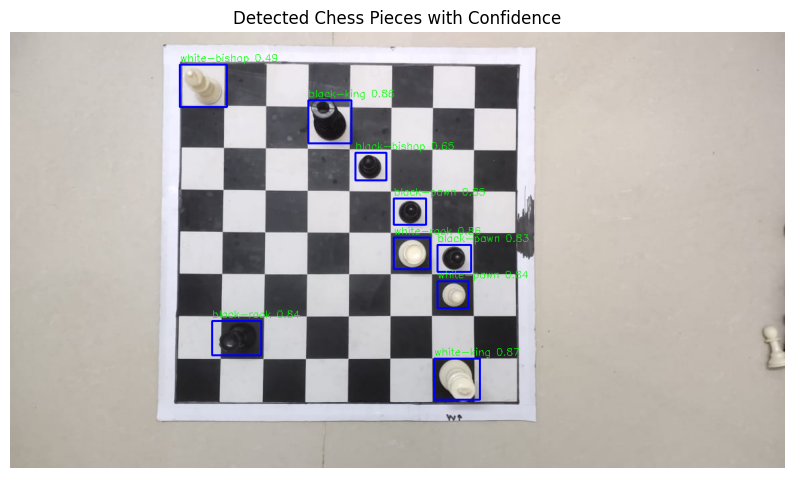

In [14]:
from supervision import BoxAnnotator, Detections
from supervision.draw.color import Color
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Prepare predictions
xyxy = []
confidences = []
class_names = []

for pred in result["predictions"]:
    x, y, width, height = pred["x"], pred["y"], pred["width"], pred["height"]
    x1 = x - width / 2
    y1 = y - height / 2
    x2 = x + width / 2
    y2 = y + height / 2

    xyxy.append([x1, y1, x2, y2])
    confidences.append(pred["confidence"])
    class_names.append(pred["class"])

# Map class names to IDs
unique_classes = sorted(set(class_names))
class_name_to_id = {name: idx for idx, name in enumerate(unique_classes)}
class_ids = [class_name_to_id[name] for name in class_names]

# Create Detections object
detections = Detections(
    xyxy=np.array(xyxy, dtype=np.float32),
    confidence=np.array(confidences, dtype=np.float32),
    class_id=np.array(class_ids, dtype=int)
)

# Annotate boxes only
annotator = BoxAnnotator(color=Color.RED, thickness=2)
annotated_image = annotator.annotate(scene=image.copy(), detections=detections)

# Add text labels manually: class + confidence
for box, class_name, conf in zip(detections.xyxy, class_names, confidences):
    x1, y1 = int(box[0]), int(box[1])
    label = f"{class_name} {conf:.2f}"
    cv2.putText(
        annotated_image,
        label,
        (x1, y1 - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 255, 0),  # Green text
        1
    )

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis("off")
plt.title("Detected Chess Pieces with Confidence")
plt.show()


📊 5. Plot Confidence Score Histogram

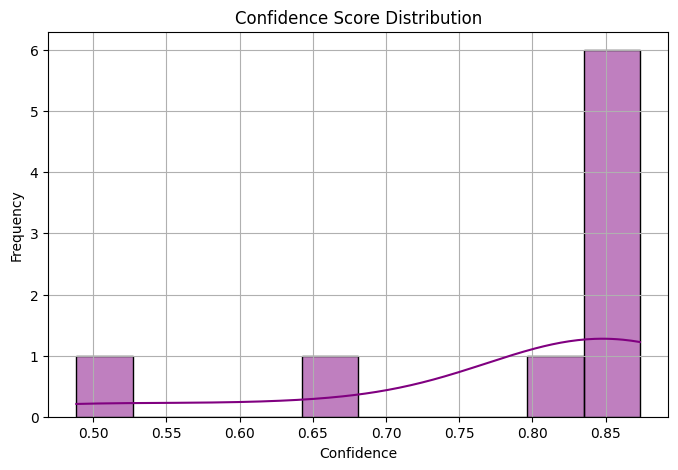

In [ ]:
confidences = [prediction["confidence"] for prediction in result["predictions"]]
plt.figure(figsize=(8, 5))
sns.histplot(confidences, bins=10, kde=True, color="purple")
plt.title("Confidence Score Distribution")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

🧮 6. Analyze Class Distribution


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



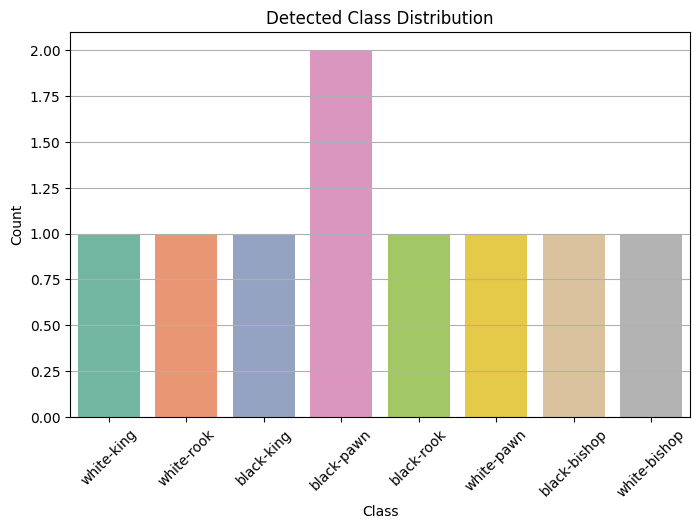

In [17]:
classes = [prediction["class"] for prediction in result["predictions"]]
plt.figure(figsize=(8, 5))
sns.countplot(x=classes, palette="Set2")
plt.title("Detected Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


Total three models were trained on roboflow with 3rd being the best

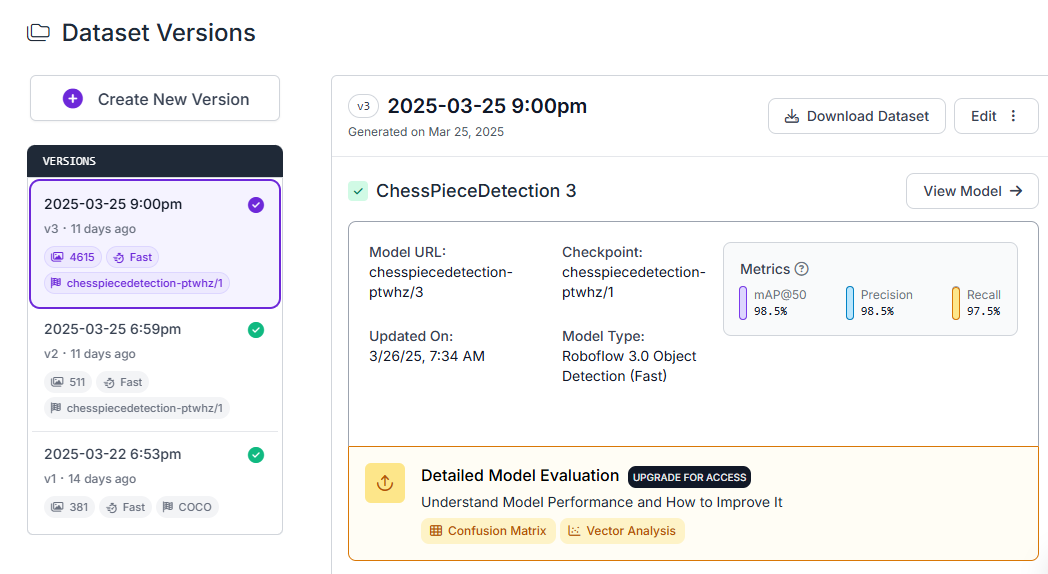

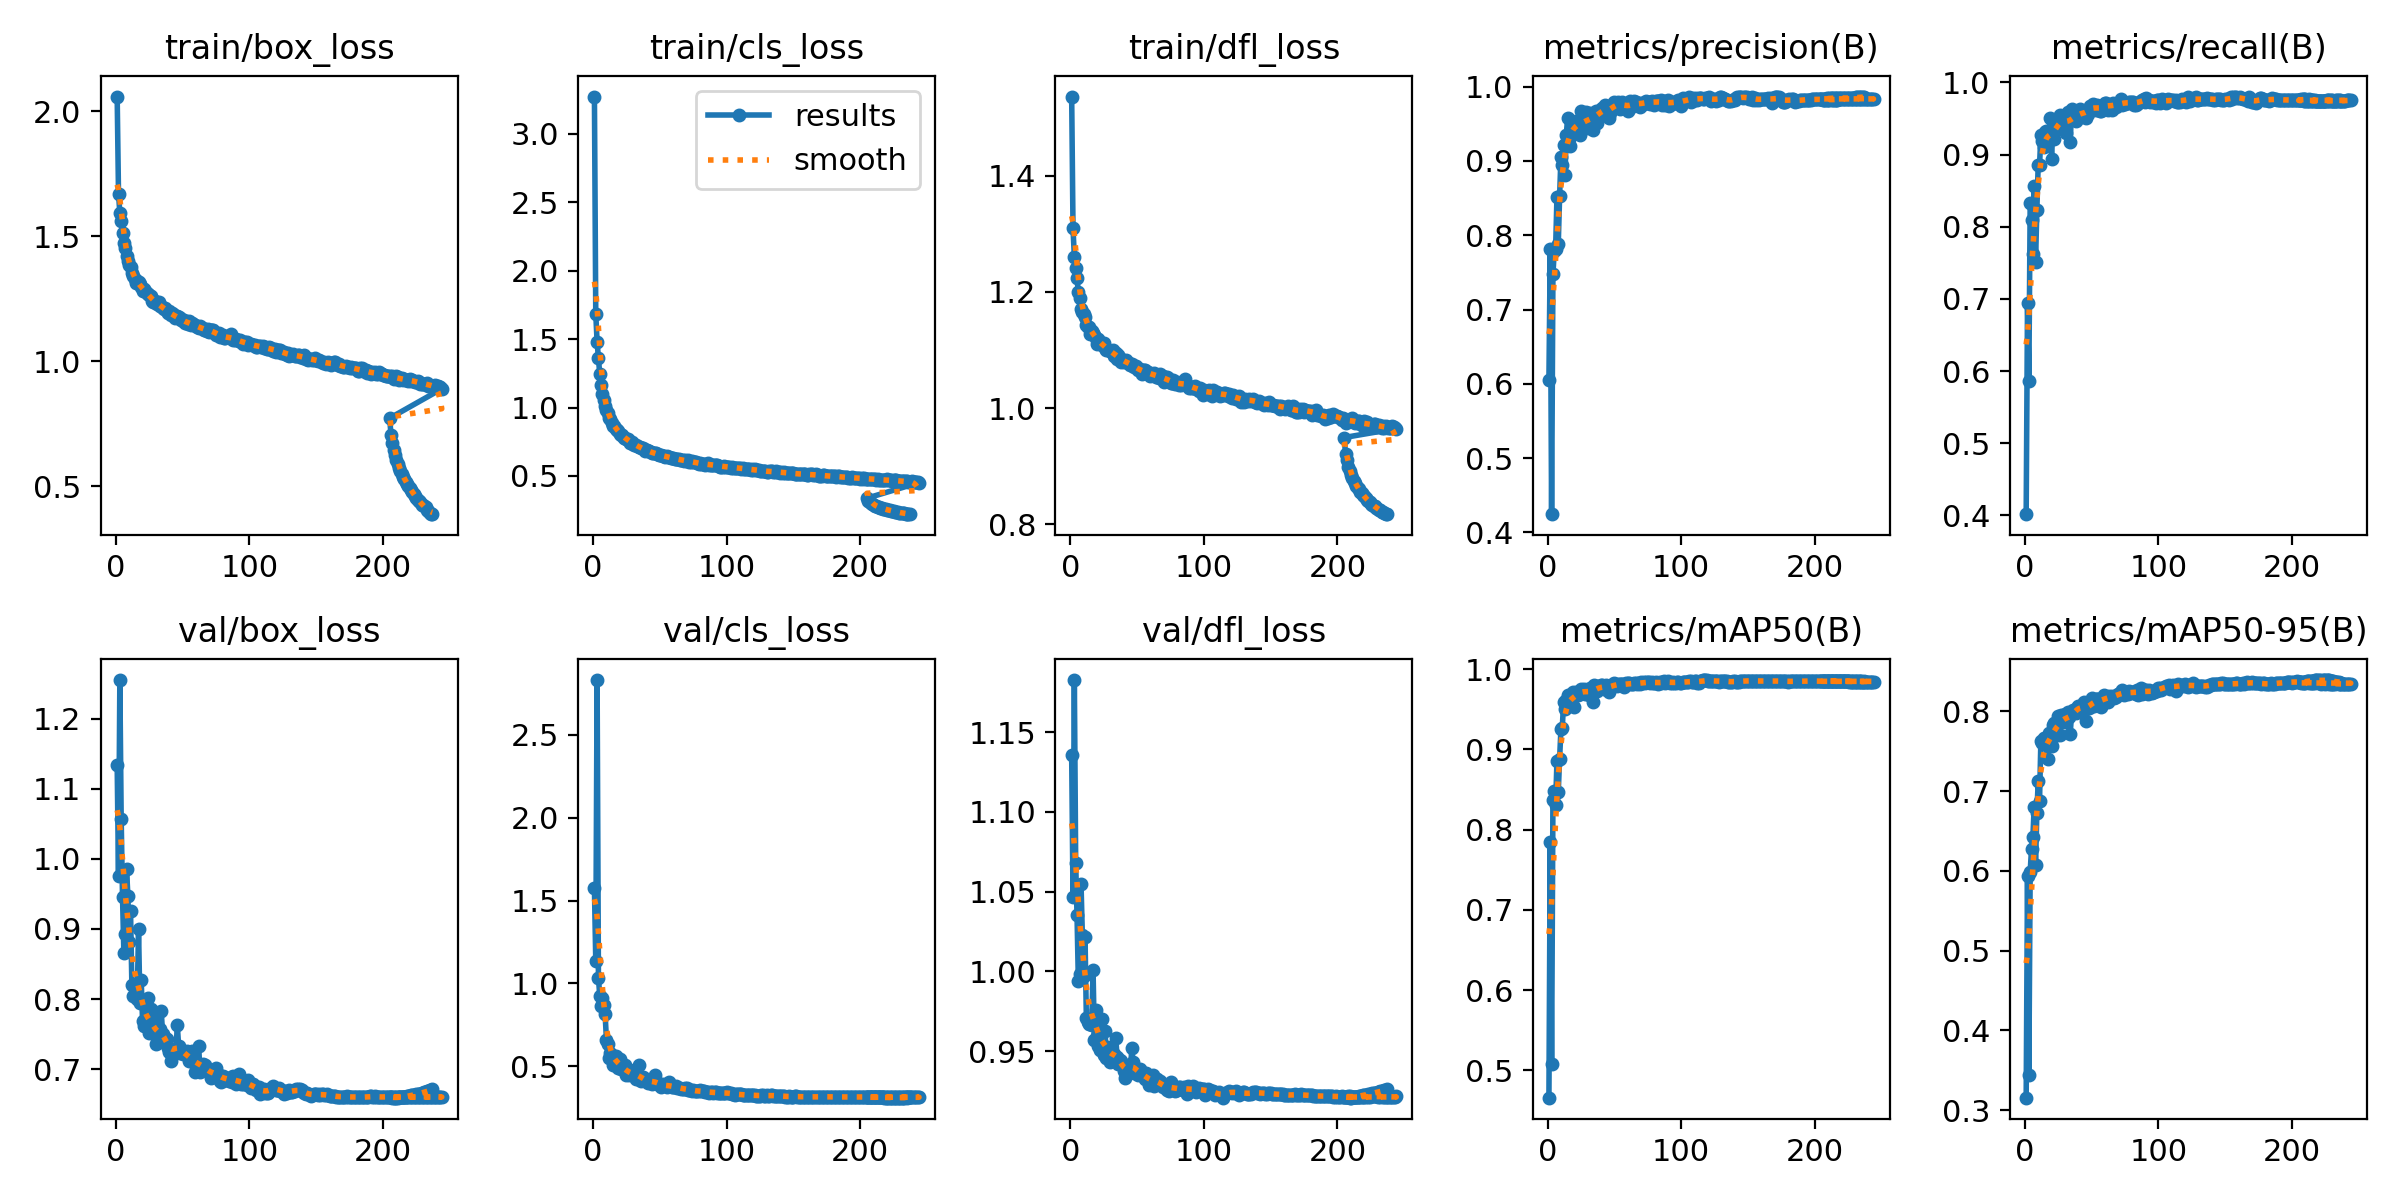